# Analysis


In [62]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [25]:
calc_df=pd.read_csv('../outputs/calc_dataset.csv', low_memory=False)
calc_df=calc_df.drop(['Unnamed: 0',], axis=1)
calc_df.head()

,name,long,lat,df_name,cat1,cat2,cat1_name,cat2_name,10001708,10001709,...,51039101,51039401,51039402,51039403,51039404,51039405,51039406,51039407,51039408,51039410
0,FORZE ARMATE,9.107364,45.456290,acqua,NaN,NaN,NaN,NaN,7540.1,7540.1,...,4609.7,8467.6,8467.6,8467.6,8467.6,8467.6,8467.6,8467.6,8467.6,8467.6
1,LORENTEGGIO,9.125151,45.458188,acqua,NaN,NaN,NaN,NaN,6445.5,6445.5,...,3735.9,7593.8,7593.8,7593.8,7593.8,7593.8,7593.8,7593.8,7593.8,7593.8
2,BANDE NERE,9.136149,45.461792,acqua,NaN,NaN,NaN,NaN,5797.8,5797.8,...,3165.9,7023.8,7023.8,7023.8,7023.8,7023.8,7023.8,7023.8,7023.8,7023.8
3,GIAMBELLINO,9.153322,45.452348,acqua,NaN,NaN,NaN,NaN,4673.6,4673.6,...,3846.8,7651.5,7651.5,7651.5,7651.5,7651.5,7651.5,7651.5,7651.5,7651.5
4,GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE,9.171006,45.408128,acqua,NaN,NaN,NaN,NaN,5655.9,5655.9,...,8094.3,10803.3,10803.3,10803.3,10803.3,10803.3,10803.3,10803.3,10803.3,10803.3


## Summary statistics

In [28]:
desc_mm=calc_df.groupby('df_name').describe()
desc_mm=desc_mm.drop(['long', 'lat'], axis=1)
desc_mm=desc_mm.T
desc_mm.head()

df_name               acqua       biblio    ciclabili        consu  \
10001708 count    52.000000    26.000000  3722.000000    21.000000   
         mean   4837.286538  4852.173077  4710.625631  3401.933333   
         std    2227.730313  2356.413434  2021.426698  1740.142727   
         min     300.000000   732.400000   167.700000  1149.100000   
         25%    3003.850000  2909.925000  3254.175000  2033.500000   

df_name                cult    distr      edicole     farmacie        metro  \
10001708 count    75.000000    847.0   562.000000   414.000000   110.000000   
         mean   3293.048000  40013.5  4272.305160  4305.478261  5610.150909   
         std     978.047843      0.0  1940.521378  2024.596546  3056.697970   
         min    1743.900000  40013.5   342.800000   233.000000  1174.400000   
         25%    2801.900000  40013.5  2807.500000  2879.775000  3591.875000   

df_name              parchi  ...         serd         sinf         sita  \
10001708 count  1065.000000  ...    15.000000   263.000000   114.000000   
         mean   4802.970047  ...  4445.560000  4764.759696  4274.764035   
         std    2108.603931  ...  1921.965073  2176.150858  2024.712556   
         min     172.600000  ...  2578.400000   201.800000   455.300000   
         25%    3716.500000  ...  3333.200000  3084.600000  2918.900000   

df_name               sport        sprim          ss2         ssec  \
10001708 count  1041.000000  1718.000000   174.000000  1128.000000   
         mean   5144.240346  4792.983818  4073.697701  4544.281294   
         std    2223.316616  2151.748558  1787.300165  2058.149003   
         min     168.200000   302.400000   819.000000   302.400000   
         25%    3472.400000  3121.600000  2981.025000  2922.825000   

df_name               treni          uni         wifi  
10001708 count    24.000000   711.000000   596.000000  
         mean   4543.304167  3615.077637  4699.220638  
         std    2247.137897  1642.314869  2046.524959  
         min     879.500000   906.800000   204.500000  
         25%    3174.725000  2450.500000  3049.850000  

[5 rows x 21 columns]

In [57]:
min_services=calc_df.groupby('df_name').min()
min_services=min_services.drop(['long', 'lat', 'cat1_name', 'cat2_name'], axis=1)
desc_services=pd.DataFrame()
desc_services['min']=min_services.min(axis=1)
desc_services['id_min']=min_services.idxmin(axis=1)
max_services=calc_df.groupby('df_name').min()
max_services=max_services.drop(['long', 'lat', 'cat1_name', 'cat2_name'], axis=1)
desc_services['max']=max_services.max(axis=1)
desc_services['id_max']=max_services.idxmax(axis=1)
avg_services=calc_df.groupby('df_name').mean()
desc_services['avg']=avg_services.mean(axis=1)
sd_services=calc_df.groupby('df_name').std()
desc_services['sd']=avg_services.std(axis=1)
desc_services

C:\Users\iodio\AppData\Local\Temp\ipykernel_24316\4287393407.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  min_services=calc_df.groupby('df_name').min()
C:\Users\iodio\AppData\Local\Temp\ipykernel_24316\4287393407.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  max_services=calc_df.groupby('df_name').min()
C:\Users\iodio\AppData\Local\Temp\ipykernel_24316\4287393407.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_services=calc_df.groupby('df_name').mean(

,min,id_min,max,id_max,avg,sd
df_name,,,,,,
acqua,42.9,51038202,13984.1,10004632,5981.121308,2356.561473
biblio,25.2,41021101,15024.7,10004632,5676.825949,2427.694043
ciclabili,7.7,51023704,12537.1,10004632,5767.238697,2421.775766
consu,18.8,30001601,16405.1,10004632,5364.003629,2481.104408
cult,52.8,20000804,15840.1,10004632,4859.519565,2536.023484
distr,29407.5,20004070,62209.7,10004632,43965.072087,4484.801138
edicole,6.0,10001902,13663.2,10004632,5534.591833,2428.477730
farmacie,0.0,30003501,13321.0,10004632,5556.572903,2422.580220
metro,33.8,10003802,12504.2,10004632,6680.246512,2349.028751


In [66]:
max_20=calc_df.groupby('df_name').min()
max_20=max_20.drop(['long', 'lat', 'cat1_name', 'cat2_name'], axis=1)
max_20=max_20.T
max_20

C:\Users\iodio\AppData\Local\Temp\ipykernel_24316\4188897004.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  max_20=calc_df.groupby('df_name').min()


df_name,acqua,biblio,ciclabili,consu,cult,distr,edicole,farmacie,metro,parchi,...,serd,sinf,sita,sport,sprim,ss2,ssec,treni,uni,wifi
10001708,300.0,732.4,167.7,1149.1,1743.9,40013.5,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
10001709,300.0,732.4,167.7,1149.1,1743.9,40013.5,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
10001710,300.0,732.4,167.7,1149.1,1743.9,40013.5,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
10001711,300.0,732.4,167.7,1149.1,1743.9,40013.5,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
10001712,300.0,732.4,167.7,1149.1,1743.9,40013.5,342.8,233.0,1174.4,172.6,...,2578.4,201.8,455.3,168.2,302.4,819.0,302.4,879.5,906.8,204.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51039405,832.8,952.8,372.5,644.2,4377.2,47044.2,514.8,756.2,532.6,1489.9,...,2969.7,350.9,564.3,745.3,425.6,1077.7,717.5,557.6,2607.6,573.5
51039406,832.8,952.8,372.5,644.2,4377.2,47044.2,514.8,756.2,532.6,1489.9,...,2969.7,350.9,564.3,745.3,425.6,1077.7,717.5,557.6,2607.6,573.5
51039407,832.8,952.8,372.5,644.2,4377.2,47044.2,514.8,756.2,532.6,1489.9,...,2969.7,350.9,564.3,745.3,425.6,1077.7,717.5,557.6,2607.6,573.5
51039408,832.8,952.8,372.5,644.2,4377.2,47044.2,514.8,756.2,532.6,1489.9,...,2969.7,350.9,564.3,745.3,425.6,1077.7,717.5,557.6,2607.6,573.5


(array([798.,  55.,  25.,   5.,   3.,   4.,  26.,  11.,   2.,   2.]),
 array([   17.5 ,  1528.69,  3039.88,  4551.07,  6062.26,  7573.45,
         9084.64, 10595.83, 12107.02, 13618.21, 15129.4 ]),
 <BarContainer object of 10 artists>)

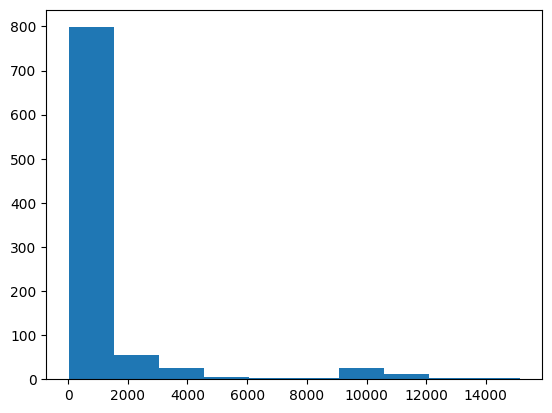

In [68]:
plt.hist(max_20['ss2'])